# **Heart Disease Classification using Machine Learning**

### **Import Libraies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Heart Disease Classification/heart.csv")

Mounted at /content/drive/


### **Data Cleaning**

In [3]:
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### **Data Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


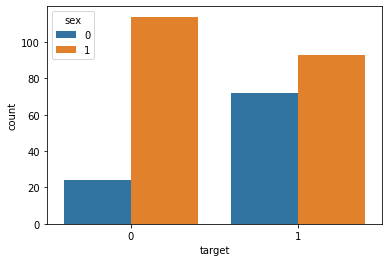

In [11]:
sns.countplot(data['target'],data=data,hue='sex')
plt.show()

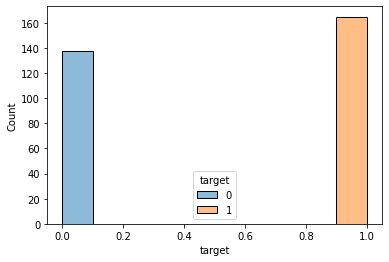

In [13]:
sns.histplot(data=data, x='target', hue='target')
plt.show()

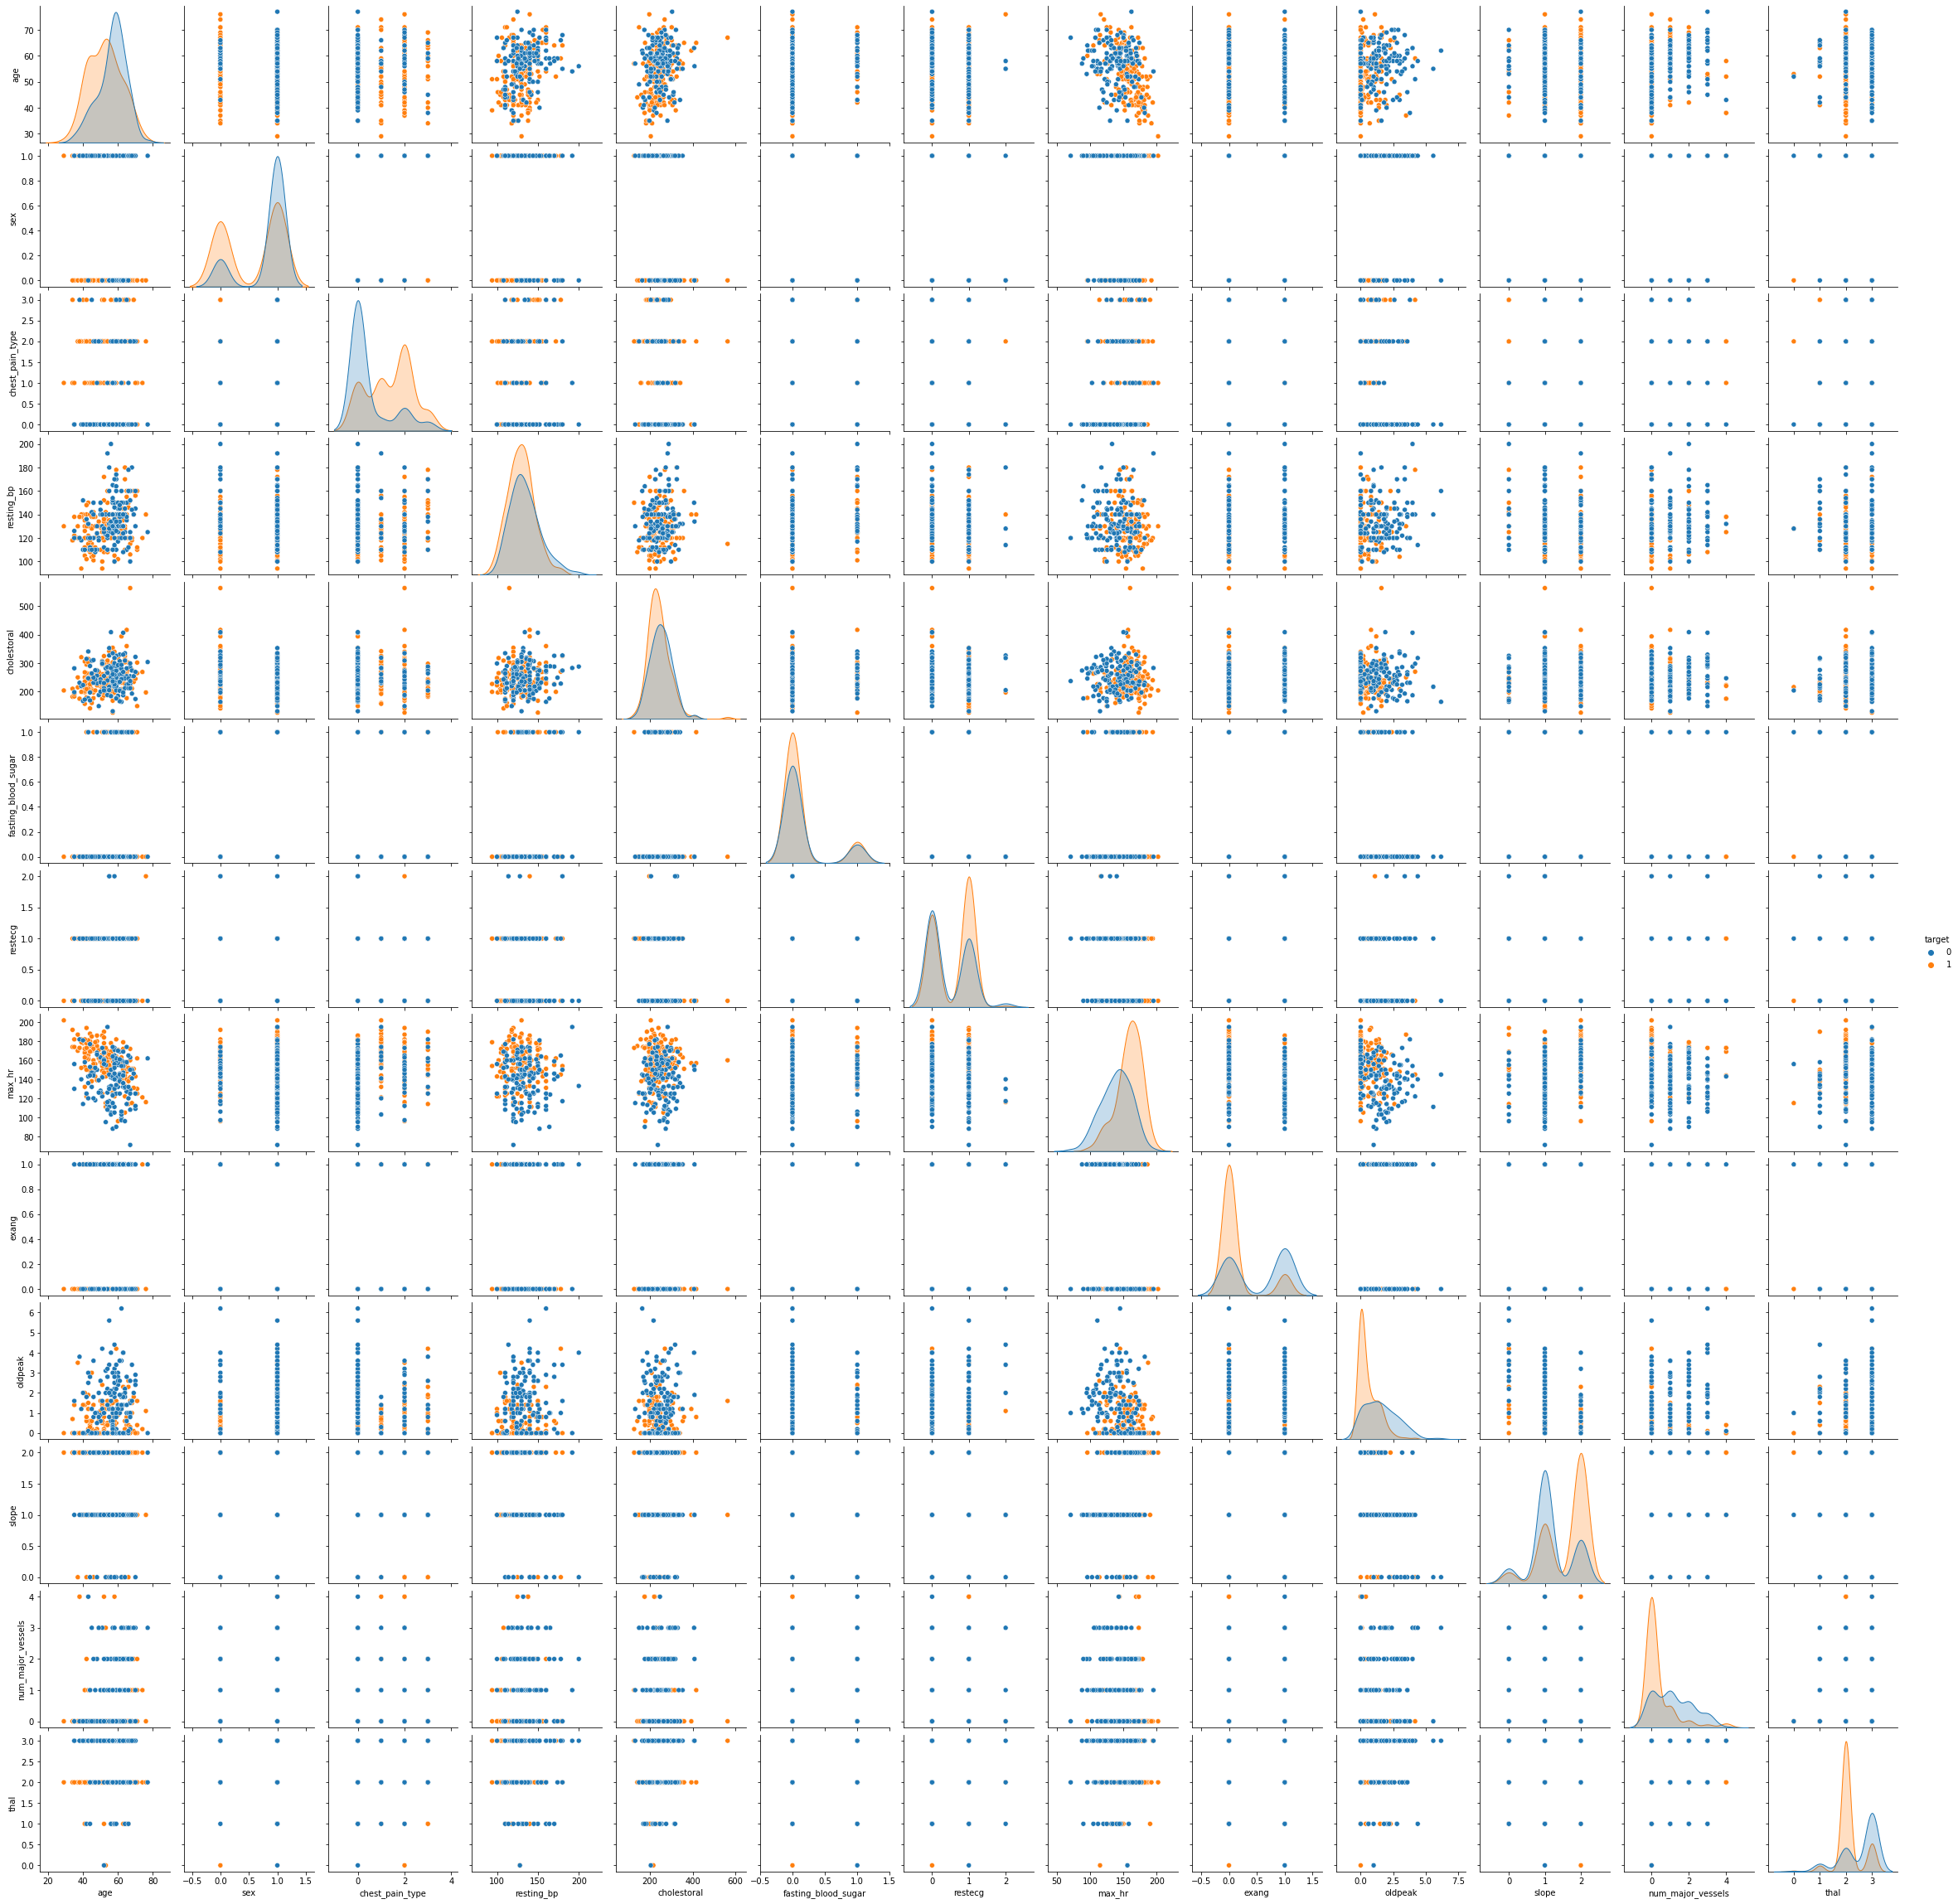

In [15]:
sns.pairplot(data, hue='target')
plt.show()

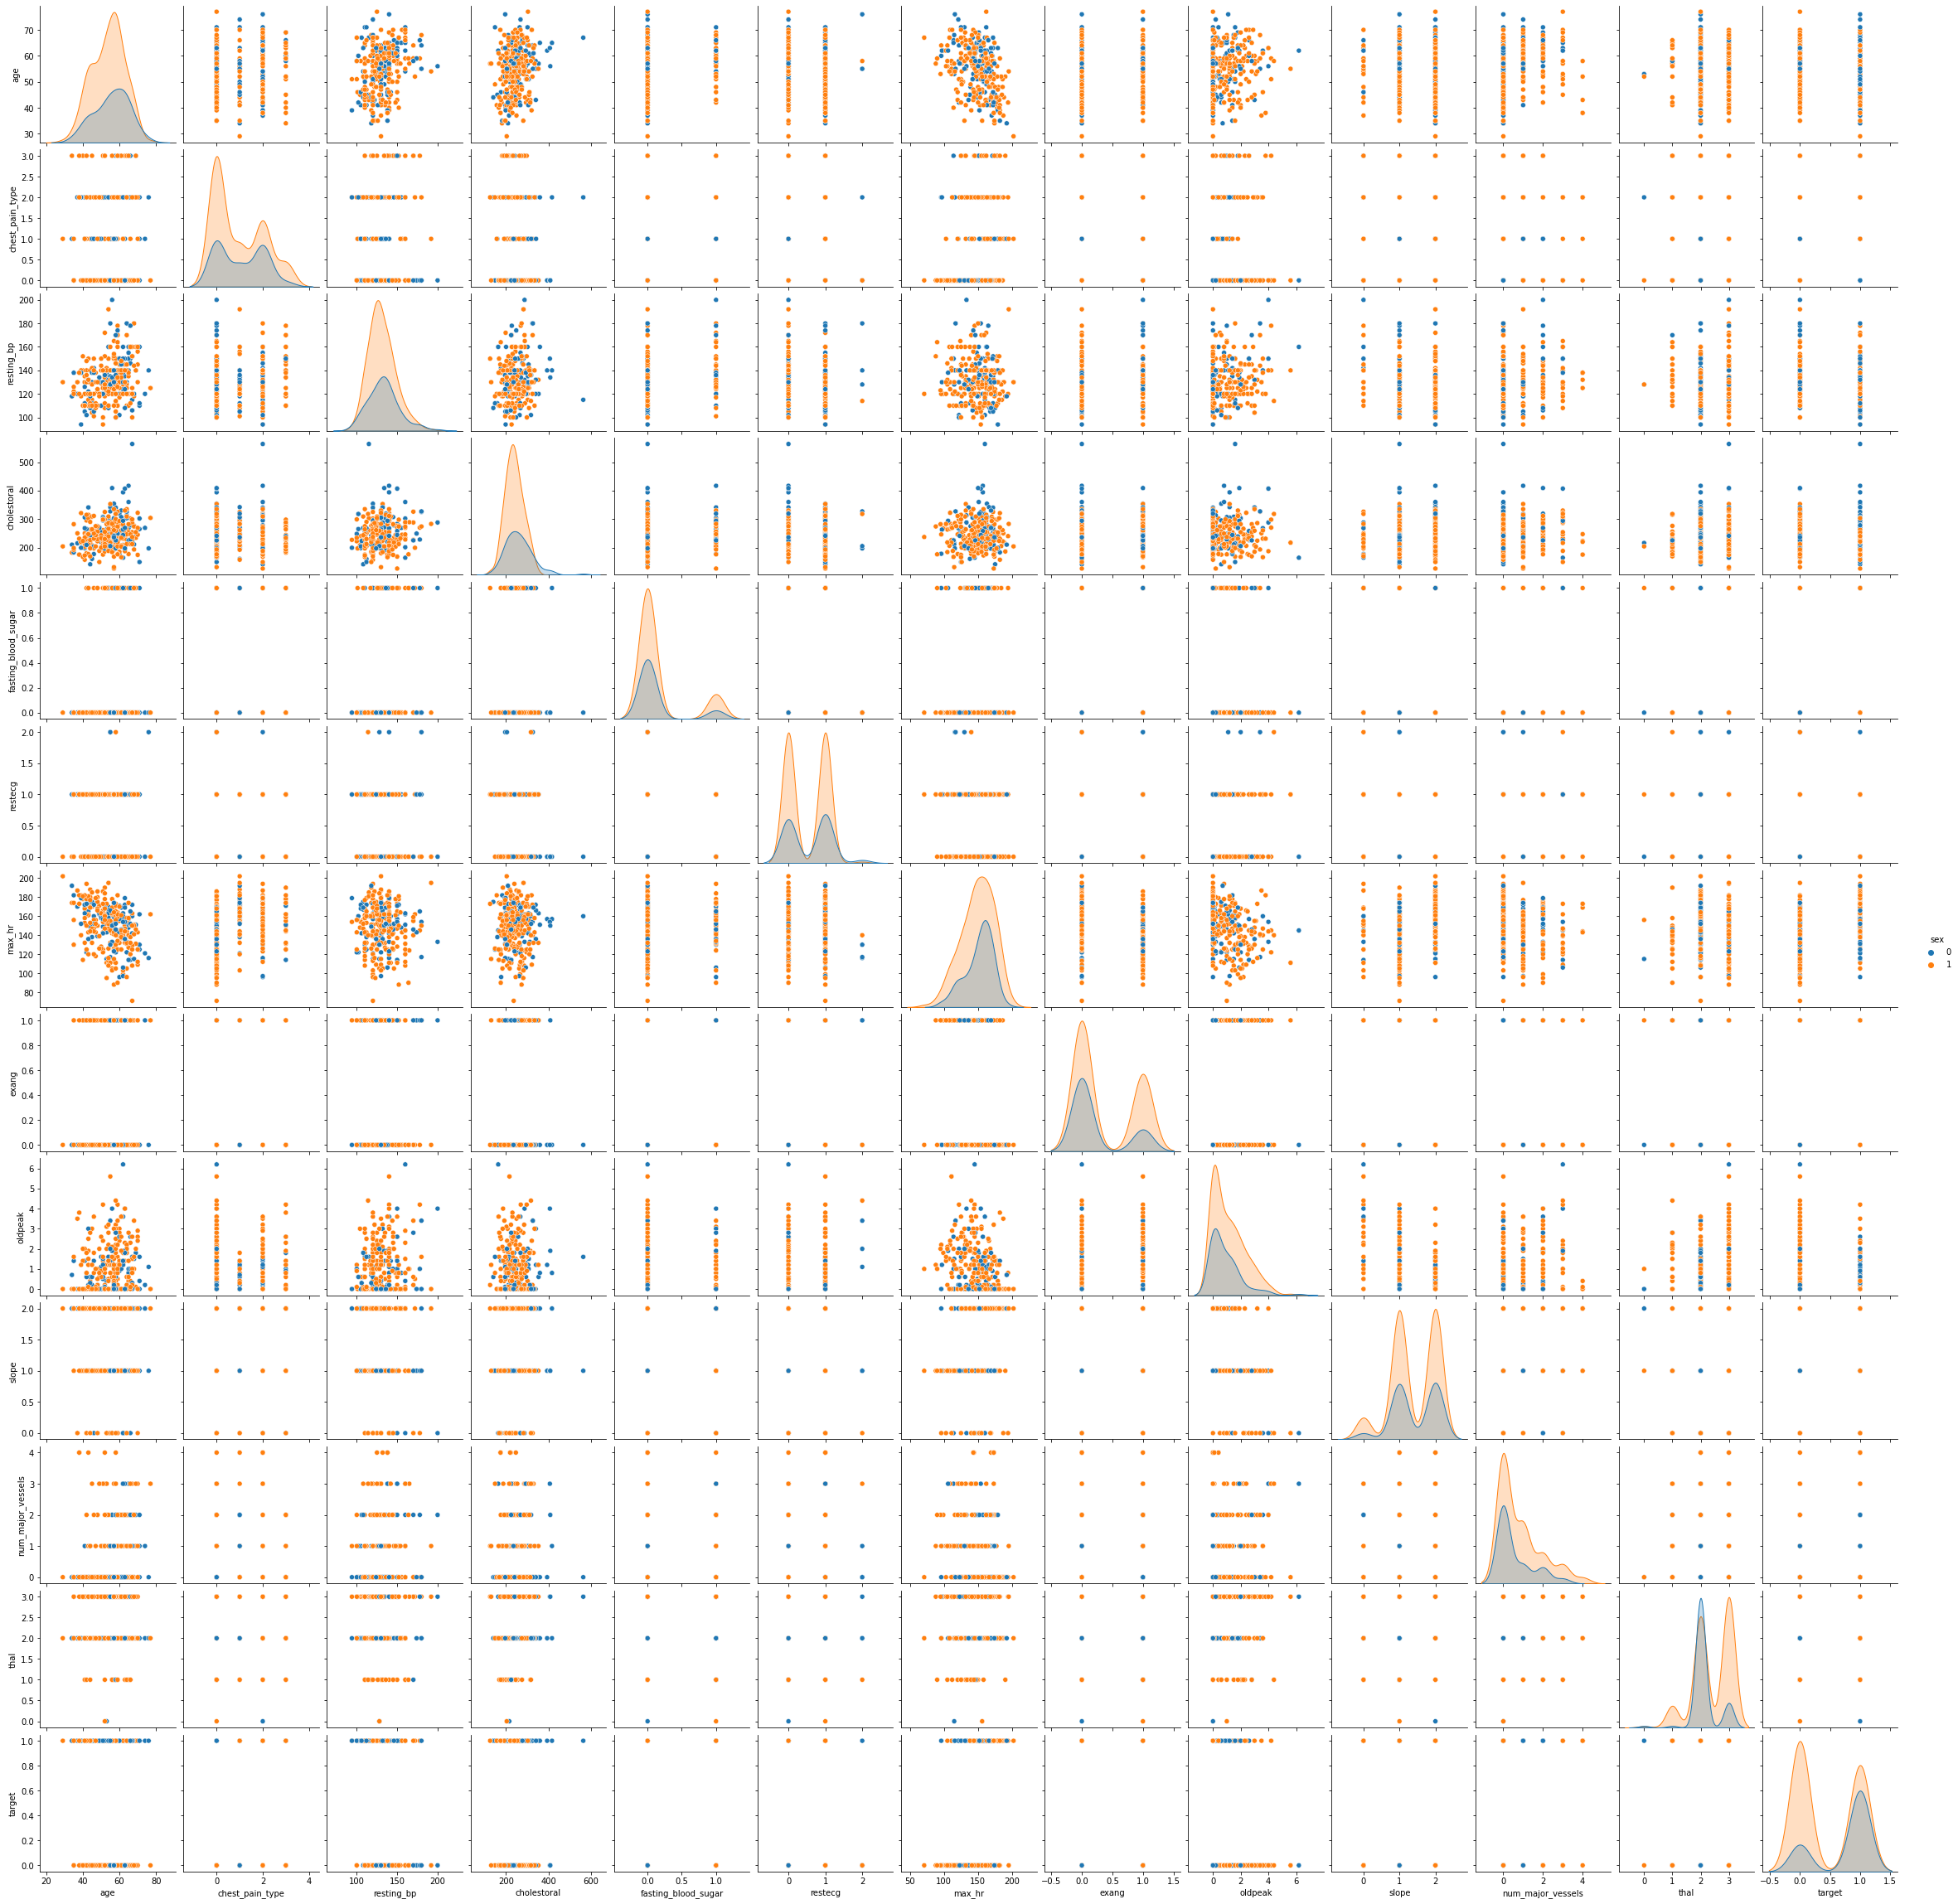

In [16]:
sns.pairplot(data, hue='sex')
plt.show()

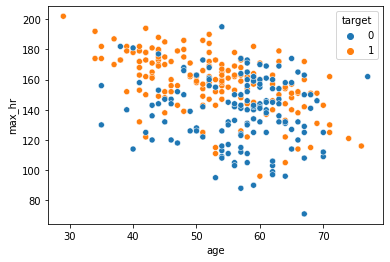

In [18]:
sns.scatterplot(data=data, x='age', y='max_hr', hue='target')
plt.show()

In [20]:
x=data.drop('target', axis=1).values
y=data['target'].values

### **Splitting Datast into Train_dataset and Test_dataset**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

### **KNeighborsClassifier**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [23]:
pred_model=knn_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_model,y_test)

0.7236842105263158

### **Logistic Regression Algorithm**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
accuracy_score(y_pred1,y_test)

0.881578947368421

### **Decision Tree Classifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = "entropy",random_state=20)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [29]:
accuracy_score(dt_pred,y_test)

0.7631578947368421

### **Random Forest Classifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
pred_model=model.predict(x_test)

In [33]:
accuracy_score(pred_model,y_test)*100

82.89473684210526

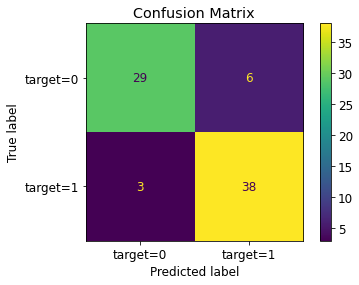

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})

cm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm, display_labels=['target=0', 'target=1']).plot()
plt.title('Confusion Matrix')
plt.show()